In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [3]:
import sklearn
from sklearn.manifold import TSNE
from sklearn import datasets

In [4]:
digits = datasets.load_digits()
iris = datasets.load_iris()

cur_dataset = digits

x, y = cur_dataset["data"], cur_dataset["target"]

In [5]:
# param
tnse_params = {
    'n_components':2,
    'perplexity':30.0,
    'early_exaggeration':12.0,
    'learning_rate':200.0,
    'n_iter':1000,
    'n_iter_without_progress':300,
    'min_grad_norm':1e-7,
    'metric':"euclidean", 
    'init':"pca", 
    'verbose':3,
    'random_state':None, 
    'method':'barnes_hut',
#     'method':'exact',
    'angle':0.5,
    }

In [6]:
tsne_obj = TSNE(**tnse_params)

# import fashion-mnist

In [14]:
import sys
sys.path.insert(0, "../research/fashion-mnist/")

In [20]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('../research/fashion-mnist/data/fashion', kind='train')
# X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [26]:
X_train.shape

(60000, 784)

In [74]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

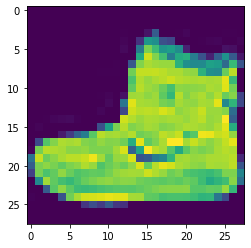

In [29]:
plt.imshow(X_train[0].reshape((28,28)))

# benchmark

In [70]:
embed = tsne_obj.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 27.830s...
[t-SNE] Computed neighbors for 60000 samples in 4621.702s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for

In [71]:
np.save('embed_sklearn', embed)

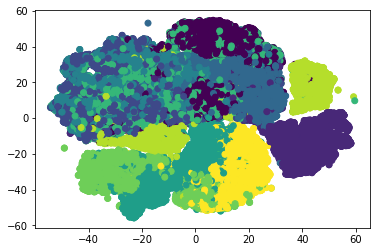

In [80]:
fig, ax = plt.subplots()
ax.scatter(embed[:,0], embed[:,1], c=y_train)
fig.savefig('./img/embedding_sklearn.png')

In [51]:
res = %timeit -n1 -r1 -o embed = tsne_obj.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 28.307s...
[t-SNE] Computed neighbors for 60000 samples in 4680.390s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for

# results

In [32]:
import pandas as pd

In [57]:
# this is using 1 core
# 1000 iteration of optimisation

columns = ['method', 'N', 'step1', 'step2', 'tot']
values = np.array([
    [0, 100,   0.020, 0.473, 0.494],
    [0, 1000,  1.331, 5.225, 6.580],
    [0, 10000, 147.7, 105.0, 253.0],
    [0, 60000, 4683, 1033, 5745]
    ])

In [58]:
res = pd.DataFrame(values, columns=columns)

In [59]:
res

,method,N,step1,step2,tot
0,0.0,100.0,0.020,0.473,0.494
1,0.0,1000.0,1.331,5.225,6.580
2,0.0,10000.0,147.700,105.000,253.000
3,0.0,60000.0,4683.000,1033.000,5745.000


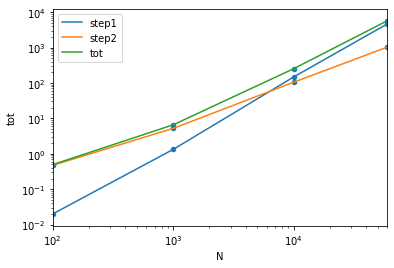

In [81]:
fig, ax = plt.subplots()
res.plot(x='N', y='step1', logx=True, logy=True, ax=ax)
res.plot(x='N', y='step1', kind='scatter', ax=ax)

res.plot(x='N', y='step2', ax=ax)
res.plot(x='N', y='step2', kind='scatter', ax=ax)

res.plot(x='N', y='tot', ax=ax)
res.plot(x='N', y='tot', kind='scatter', ax=ax)
fig.savefig('./img/performance_sklearn.png')

In [ ]:
import cProfile

In [ ]:
cProfile.run('tsne_obj.fit_transform(x)', sort='tottime')

In [ ]:
cProfile.run('tsne_obj.fit_transform(x)', 'prof_sklearn.stats')

In [ ]:
import pstats

In [ ]:
stats = pstats.Stats('prof_sklearn.stats')

In [ ]:
stats.strip_dirs()
stats.sort_stats('tottime')

# limit output to lines with "(fib" in them
stats.print_stats('_tsne')